In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [1]:


data_path = 'final_countvectorize.csv'  
data = pd.read_csv(data_path)

y = data.iloc[:, 0]  
X = data.iloc[:, 1:]  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', random_state=42) 


svm_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f'Accuracy - SVM: {accuracy_svm}')
print(f'Classification Report - SVM: \n{class_report_svm}')
print(f'Confusion Matrix - SVM: \n{conf_matrix_svm}')


Accuracy - SVM: 0.75
Classification Report - SVM: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.00      0.00      0.00         5

    accuracy                           0.75        32
   macro avg       0.41      0.44      0.43        32
weighted avg       0.70      0.75      0.72        32

Confusion Matrix - SVM: 
[[24  3]
 [ 5  0]]


Best Kernel: poly
Best Cost: 0.1
Best Accuracy: 0.84375
Best Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       0.00      0.00      0.00         5

    accuracy                           0.84        32
   macro avg       0.42      0.50      0.46        32
weighted avg       0.71      0.84      0.77        32



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

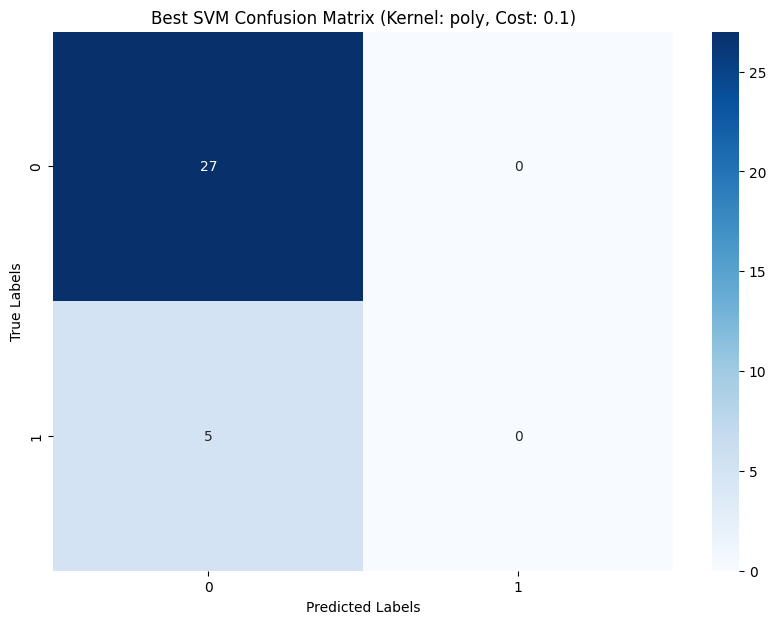

In [6]:



data_path = 'final_countvectorize.csv'
data = pd.read_csv(data_path)

y = data.iloc[:, 0]  
X = data.iloc[:, 1:]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf']
costs = [0.1, 1, 10]
best_accuracy = 0
best_kernel = None
best_cost = None
best_cm = None
best_svc = None

for kernel in kernels:
    for cost in costs:
        svm_classifier = SVC(kernel=kernel, C=cost, random_state=42)
        svm_classifier.fit(X_train_scaled, y_train)
        y_pred_svm = svm_classifier.predict(X_test_scaled)
        current_accuracy = accuracy_score(y_test, y_pred_svm)
        
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_kernel = kernel
            best_cost = cost
            best_cm = confusion_matrix(y_test, y_pred_svm)
            best_svc = svm_classifier


print(f'Best Kernel: {best_kernel}')
print(f'Best Cost: {best_cost}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best Classification Report:\n{classification_report(y_test, best_svc.predict(X_test_scaled))}')


plt.figure(figsize=(10, 7))
sns.heatmap(best_cm, annot=True, fmt='g', cmap='Blues')
plt.title(f'Best SVM Confusion Matrix (Kernel: {best_kernel}, Cost: {best_cost})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
